In [1]:
from os import listdir
import os
import xarray as xr
import matplotlib.pyplot as plt

### Arquivo de 1 dia com 288 observações (varreduras) contendo a tag "rain"

In [2]:
pathFile = os.path.join('../test/20190113.nc')
file = xr.open_mfdataset(pathFile)
file

c:\Users\rapha\anaconda3\envs\wradlib\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<xarray.Dataset>
Dimensions:                         (x: 480, y: 480, time: 288)
Coordinates:
  * x                               (x) int32 549850 550350 ... 788850 789350
  * y                               (y) int32 5271250 5270750 ... 5031750
  * time                            (time) datetime64[ns] 2019-01-13 ... 2019...
Data variables:
    transverse_mercator             |S1 ...
    equivalent_reflectivity_factor  (time, y, x) float32 dask.array<chunksize=(288, 480, 480), meta=np.ndarray>
Attributes:
    Conventions:         CF-1.7
    GDAL_AREA_OR_POINT:  Area
    title:               MAX(Z) Reflectivity day 2019-01-13
    institution:         Meteotrentino, Fondazione Bruno Kessler
    source:              radar observation mt.Macaion
    site_lat_lon_elev:   46.494002, 11.208826, 1876
    references:          original dataset https://doi.org/10.5281/zenodo.3577451
    comments:            NetCDF generation code https://github.com/MPBA/TAASR...
    chunks:              288
    tags:                rain

### Filtrar somente o produto Refletividade

In [3]:
plotFile = file.equivalent_reflectivity_factor
plotFile

<xarray.DataArray 'equivalent_reflectivity_factor' (time: 288, y: 480, x: 480)>
dask.array<open_dataset-2346fe017fdb4309ac7f61947546a1e3equivalent_reflectivity_factor, shape=(288, 480, 480), dtype=float32, chunksize=(288, 480, 480), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) int32 549850 550350 550850 551350 ... 788350 788850 789350
  * y        (y) int32 5271250 5270750 5270250 ... 5032750 5032250 5031750
  * time     (time) datetime64[ns] 2019-01-13 ... 2019-01-13T23:55:00
Attributes:
    standard_name:  equivalent_reflectivity_factor
    units:          dBZ
    long_name:      MAX(Z) Reflectivity (dBZ)
    valid_range:    [ 0.  52.5]
    grid_mapping:   transverse_mercator

### Plot da imagem original (480x480 px) da última observação do dia

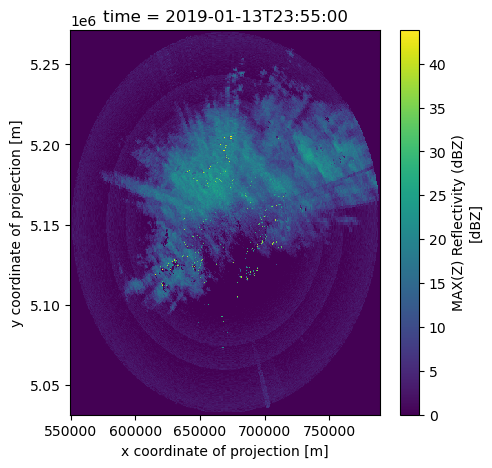

In [4]:
plt.figure(figsize=(5,5));
plotFile[-1].plot.pcolormesh(x='x', y='y', add_colorbar=True);

### Dataset com 5 dias com 556 observações (varreduras) contendo as tags ("rain", "storm", "downpour", "hail")

In [5]:
pathDataset = os.path.join('../dataset/TensorTeste.nc')
ds = xr.open_mfdataset(pathDataset)
ds

<xarray.Dataset>
Dimensions:  (x: 120, y: 120, sample: 556, time: 5, channel: 1)
Coordinates:
  * x        (x) int32 549850 551850 553850 555850 ... 783850 785850 787850
  * y        (y) int32 5271250 5269250 5267250 ... 5037250 5035250 5033250
Dimensions without coordinates: sample, time, channel
Data variables:
    x_data   (sample, time, x, y, channel) float32 dask.array<chunksize=(556, 5, 120, 120, 1), meta=np.ndarray>
    y_data   (sample, time, x, y, channel) float32 dask.array<chunksize=(556, 5, 120, 120, 1), meta=np.ndarray>

### Coordenadas "x" e "y"

In [6]:
ds.coords

Coordinates:
  * x        (x) int32 549850 551850 553850 555850 ... 783850 785850 787850
  * y        (y) int32 5271250 5269250 5267250 ... 5037250 5035250 5033250

### Dimensões do tensor

In [7]:
ds.dims

Frozen({'x': 120, 'y': 120, 'sample': 556, 'time': 5, 'channel': 1})

### Variáveis "x_data" e "y_data"

In [8]:
ds.data_vars

Data variables:
    x_data   (sample, time, x, y, channel) float32 dask.array<chunksize=(556, 5, 120, 120, 1), meta=np.ndarray>
    y_data   (sample, time, x, y, channel) float32 dask.array<chunksize=(556, 5, 120, 120, 1), meta=np.ndarray>

### Estrutura x_data

In [9]:
ds.x_data

<xarray.DataArray 'x_data' (sample: 556, time: 5, x: 120, y: 120, channel: 1)>
dask.array<open_dataset-52a92f69a70da373c6287b5d3fd31a26x_data, shape=(556, 5, 120, 120, 1), dtype=float32, chunksize=(556, 5, 120, 120, 1), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) int32 549850 551850 553850 555850 ... 783850 785850 787850
  * y        (y) int32 5271250 5269250 5267250 ... 5037250 5035250 5033250
Dimensions without coordinates: sample, time, channel
Attributes:
    standard_name:  equivalent_reflectivity_factor
    units:          dBZ
    long_name:      MAX(Z) Reflectivity (dBZ)
    valid_range:    [ 0.  52.5]
    grid_mapping:   transverse_mercator

### Transposto do dataset para adeaquação às dimensões do plot (sem as dimensões sample e channel)

In [10]:
ds_t = ds.transpose("sample","channel","time","x","y")
ds_plot = ds_t.x_data[0][0][0]
ds_plot

<xarray.DataArray 'x_data' (x: 120, y: 120)>
dask.array<getitem, shape=(120, 120), dtype=float32, chunksize=(120, 120), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) int32 549850 551850 553850 555850 ... 783850 785850 787850
  * y        (y) int32 5271250 5269250 5267250 ... 5037250 5035250 5033250
Attributes:
    standard_name:  equivalent_reflectivity_factor
    units:          dBZ
    long_name:      MAX(Z) Reflectivity (dBZ)
    valid_range:    [ 0.  52.5]
    grid_mapping:   transverse_mercator

### Plot da imagem reduzida (120x120 px) da primeira observação do dataset

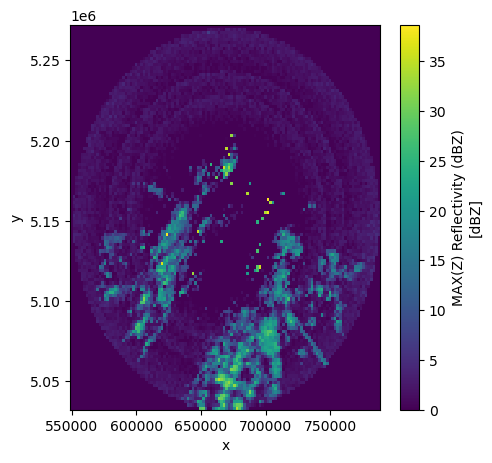

In [11]:
plt.figure(figsize=(5,5));
ds_plot.plot.pcolormesh(x='x', y='y', add_colorbar=True);